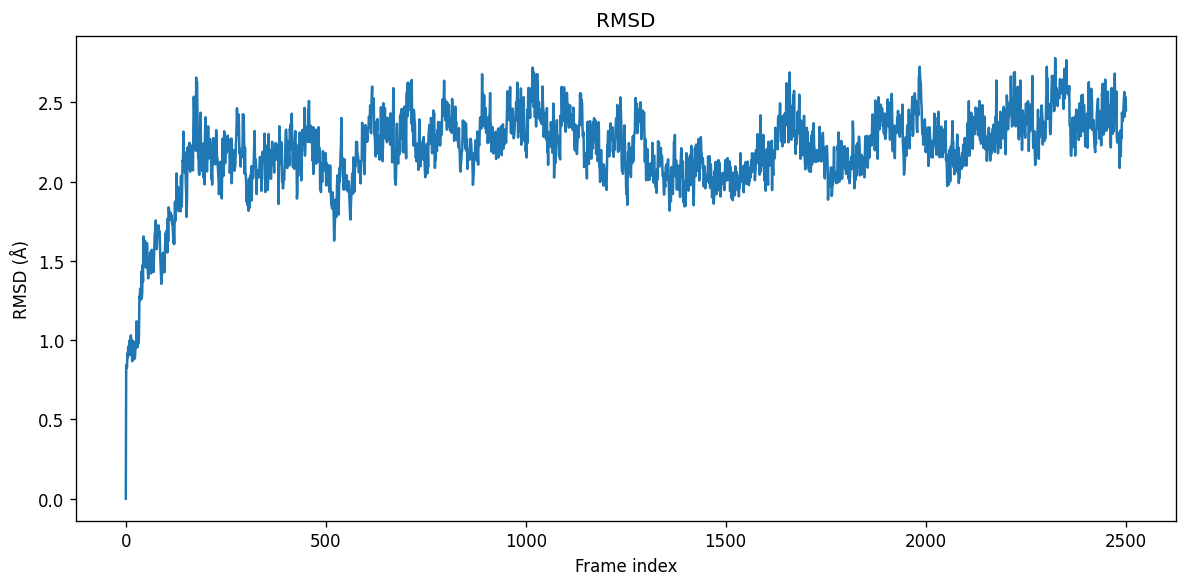

Frames: 2502 | RMSD mean ± sd: 2.199 ± 0.264 Å


In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ==== EDIT THESE ====
PATH = "6W3C_dephos_RMSD_50ns.csv"            # your text file that contains 'Result = [ ... ]'
FRAME_SPACING_PS = None         # e.g., 10.0 if frames are 10 ps apart; leave None to plot vs frame index

# 1) Read file and extract the Result array of RMSD values
with open(PATH, "r", encoding="utf-8", errors="ignore") as f:
    txt = f.read()

m = re.search(r"Result\s*=\s*\[([^\]]+)\]", txt, flags=re.DOTALL)
if not m:
    raise ValueError("Could not find a 'Result = [ ... ]' array in the file.")

vals_str = m.group(1).strip()
# Split on any whitespace; filter out empty chunks; convert to float
vals = [float(x) for x in re.split(r"\s+", vals_str) if x.strip() != ""]
rmsd = np.array(vals, dtype=float)

# 2) Build x-axis: frame index or time (ns) if spacing provided
frames = np.arange(len(rmsd))
if FRAME_SPACING_PS is None:
    x = frames
    x_label = "Frame index"
else:
    time_ps = frames * float(FRAME_SPACING_PS)
    x = time_ps / 1000.0
    x_label = "Time (ns)"

# 3) Plot
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["figure.dpi"] = 120

plt.figure()
plt.plot(x, rmsd)
plt.xlabel(x_label)
plt.ylabel("RMSD (Å)")
plt.title("RMSD")
plt.tight_layout()
plt.show()

# 4) Simple stats
mean = float(rmsd.mean())
std  = float(rmsd.std(ddof=1)) if len(rmsd) > 1 else 0.0
print(f"Frames: {len(rmsd)} | RMSD mean ± sd: {mean:.3f} ± {std:.3f} Å")

# 5) Optional: make a DataFrame you can save if you want
if FRAME_SPACING_PS is None:
    df = pd.DataFrame({"frame": frames, "rmsd_A": rmsd})
else:
    df = pd.DataFrame({"time_ns": x, "rmsd_A": rmsd})

# Uncomment to save:
# df.to_csv("rmsd_from_result.csv", index=False)
